## Temperature Converter

- This notebook provides an introductory Python example to convert temperatures between **Celsius** to **Fahrenheit**.
- The goal is to practice basic programming concepts and notebook organization as a starting point for the *Deep Learning* course.  

In [209]:
# Importing libraries
import torch
from torch import nn

### Inputs and Outputs as Tensors

- Inputs (**X**) and outputs (**y**) must be defined as **tensors**.
- Tensors = multidimensional arrays, optimized for **CPU/GPU**.  
- Why tensors?  
  - Fast numerical computation  
  - Required by PyTorch layers and losses  
  - Enable automatic differentiation (backpropagation) 

In [210]:
# Define input (Fahrenheit)
X = torch.tensor([
    [32],
    [68],
    [122],
    [212]
], dtype=torch.float32)

print(X)

tensor([[ 32.],
        [ 68.],
        [122.],
        [212.]])


In [211]:
# Define output (Celsius)
y = torch.tensor([
    [0],
    [20],
    [50],
    [100]
], dtype=torch.float32)

print(y)

tensor([[  0.],
        [ 20.],
        [ 50.],
        [100.]])


### Data Normalization

- Keeps values on a similar scale → stable training.  
- Prevents exploding loss (`NaN`).  
- Methods:  
  - Z-score → mean 0, std 1.  
  - Min-Max → range [0, 1].  
- Normalize inputs and targets, then **denormalize** predictions. 

In [212]:
# Normalizing input
X_mean = X.mean()
X_std = X.std()

X = (X - X_mean) / X_std

# Normalizing output
y_mean = y.mean()
y_std = y.std()

y = (y - y_mean) / y_std

### Creating the Model

- Define a **linear model** with **one neuron**.  
- Formula: y = w * X + b
- Learns:  
  - **w** → weight  
  - **b** → bias  
- Simplest neural network, baseline before deeper models.  

In [213]:
# Define model
model = nn.Linear(1, 1) # 1 input and 1 output

# Define criterion (loss function)
criterion = nn.MSELoss()

# Define optimizer (for calculate gradient)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

### Training Loop

- Core cycle of model learning.  
- Each epoch:  
  1. **Forward pass** → compute predictions.  
  2. **Loss** → measure error vs. targets.  
  3. **Backward pass** → calculate gradients.  
  4. **Optimizer step** → update weights/bias.  
- Repeat until the model converges.  

In [214]:
# Training loop

epochs = 2500 # Number of iterations
losses = [] # List to store loss values

for epoch in range(epochs):
    optimizer.zero_grad()             # Resetting the gradient
    y_pred = model(X)                 # Calculating the model prediction
    loss = criterion(y_pred, y)       # Calculating the error
    loss.backward()                   # Calculates the gradients of the parameters with respect to the loss
    optimizer.step()                  # Update the model weights using the calculated gradients

    losses.append(loss.item())        # Storing loss values 

    if epoch % 250 == 0:
        print(f"Loss: {loss.item()}") # Print loss 

Loss: 0.12285402417182922
Loss: 0.05566735565662384
Loss: 0.02542351931333542
Loss: 0.011687468737363815
Loss: 0.005401880946010351
Loss: 0.0025076931342482567
Loss: 0.0011682435870170593
Loss: 0.0005457982188090682
Loss: 0.0002555648679845035
Loss: 0.00011987314792349935


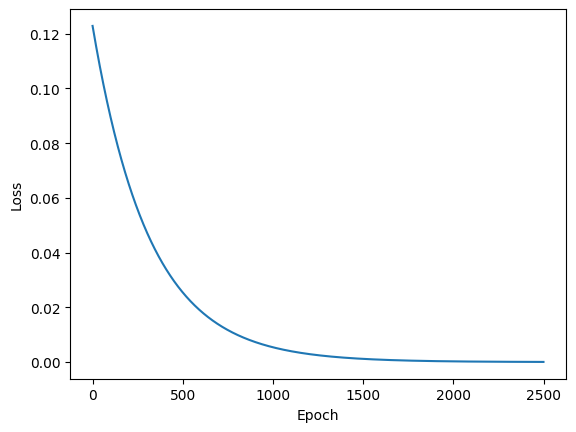

In [215]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Model Evaluation

- Switch to eval mode → `model.eval()`  
- Disable gradients → `with torch.no_grad()`  
- Run inputs → get predictions  
- Compare predictions vs. targets (accuracy, loss, error)  
- Checks if the model generalizes, not just memorizes  

In [216]:
# Defining X input to evaluation
X_test = torch.tensor([
    [46.4],
    [80]
], dtype=torch.float32)

# Defining y output to evaluation
y_test = torch.tensor([
    [8],
    [26.67]
], dtype=torch.float32)

model.eval()
with torch.no_grad():
    y_pred = model((X_test - X_mean) / X_std) # Apply model on normalizated X
    y_pred = y_pred * y_std + y_mean # Denormalize prediction
    
    mae = torch.mean(torch.abs(y_pred - y_test)) # Mean absolute error
    print(f"MAE: {mae:.5f}")

MAE: 0.17091
